In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load dataset
file_path = "Kindle_Review_Dataset.csv"
data = pd.read_csv(file_path)


In [3]:
# Preprocess data
data = data.dropna(subset=['reviewText', 'rating'])

In [4]:
def assign_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

data['sentiment'] = data['rating'].apply(assign_sentiment)
X = data['reviewText']
y = LabelEncoder().fit_transform(data['sentiment'])

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
# Train XGBoost model
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [8]:
# Evaluate model
y_pred = model.predict(X_test_tfidf)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.7254166666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       803
           1       0.38      0.15      0.21       387
           2       0.75      0.89      0.82      1210

    accuracy                           0.73      2400
   macro avg       0.62      0.60      0.59      2400
weighted avg       0.69      0.73      0.70      2400



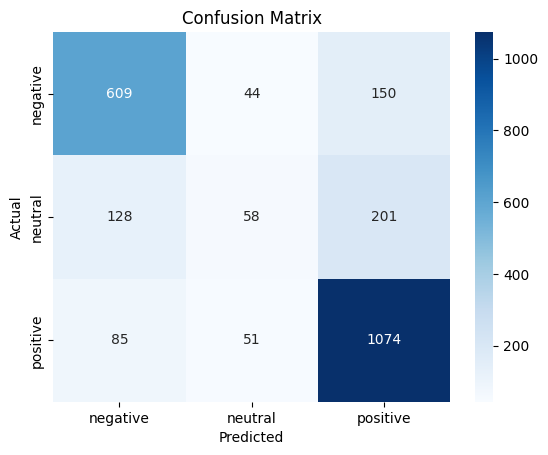

In [9]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Save model and vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("Model and vectorizer saved.")

Model and vectorizer saved.


In [3]:
import joblib
import numpy as np
# Load saved files
model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [4]:
# Example input for testing
new_reviews = [
    "This product is amazing! Highly recommend it.",
    "The book was okay, not great but not bad either.",
    "Terrible experience, would not buy again."
]

In [5]:
# Transform the new data using the vectorizer
new_reviews_tfidf = vectorizer.transform(new_reviews)

In [6]:
# Predict sentiment
predictions = model.predict(new_reviews_tfidf)

In [7]:
# Map predictions back to labels
label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
predicted_labels = [label_mapping[pred] for pred in predictions]

In [8]:
# Print results
for review, label in zip(new_reviews, predicted_labels):
    print(f"Review: {review}\nPredicted Sentiment: {label}\n")

Review: This product is amazing! Highly recommend it.
Predicted Sentiment: positive

Review: The book was okay, not great but not bad either.
Predicted Sentiment: neutral

Review: Terrible experience, would not buy again.
Predicted Sentiment: negative

